## 0. Préalable

Importation des modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Chargement des jeux de données

In [23]:
smart188 = pd.read_csv('data/SMART188.csv', delimiter=';')
smart189 = pd.read_csv('data/SMART189.csv', delimiter=';')

Aperçu des datasets

In [24]:
smart188.sample(3)

,bucket_start_timestamp,CO,NO2,O3,PM10,PM2.5,RH,T,Temp. int.,latitude,longitude
2112,2022-11-05 13:00:00,325.660835,238.092070,238.092070,7.160835,2.960371,40.585664,18.864117,288.861947,5.33568,-3.978219
3469,2023-01-01 02:00:00,274.400000,157.166667,157.166667,31.933333,18.000000,67.383333,17.963333,286.566667,5.33568,-3.978219
229,2022-08-19 02:00:00,333.099323,560.465889,560.465889,14.599323,6.266366,41.549912,23.579095,334.476800,5.33568,-3.978219


In [25]:
smart189.sample(3)

,bucket_start_timestamp,CO,NO2,O3,PM10,PM2.5,RH,T,Temp. int.,latitude,longitude
935,2022-09-17 12:00:00,376.111283,553.114705,553.114705,15.645562,10.093453,40.228202,23.254212,339.006734,5.335681,-3.978213
4689,2023-02-20 22:00:00,307.033333,132.633333,132.633333,92.300000,28.100000,84.746667,28.596667,407.033333,5.335681,-3.978213
4634,2023-02-18 15:00:00,288.566667,133.533333,133.533333,105.933333,33.333333,50.286667,33.970000,474.600000,5.335681,-3.978213


Nos dataframes comportent chacun une colonne temporelle (bucket_start_timestamp). Il serait intéressant d'utiliser cette colonne comme index en lieu et place de la suite de nombres entiers.

In [26]:
smart188 = pd.read_csv('data/SMART188.csv', delimiter=';', index_col='bucket_start_timestamp', parse_dates=True)
smart189 = pd.read_csv('data/SMART189.csv', delimiter=';', index_col='bucket_start_timestamp', parse_dates=True)

In [27]:
smart188.sample(3)

,CO,NO2,O3,PM10,PM2.5,RH,T,Temp. int.,latitude,longitude
bucket_start_timestamp,,,,,,,,,,
2022-09-15 15:00:00,330.488149,447.301208,447.301208,11.988149,5.105844,41.211427,21.923970,318.464363,5.33568,-3.978219
2022-10-01 04:00:00,329.014673,383.442772,383.442772,10.514673,4.450966,41.020421,20.989988,309.428601,5.33568,-3.978219
2023-02-22 14:00:00,307.133333,28.133333,28.133333,97.800000,18.333333,60.356667,34.550000,462.300000,5.33568,-3.978219


In [28]:
smart189.index

DatetimeIndex(['2022-08-09 13:00:00', '2022-08-09 14:00:00',
               '2022-08-09 15:00:00', '2022-08-09 16:00:00',
               '2022-08-09 17:00:00', '2022-08-09 18:00:00',
               '2022-08-09 19:00:00', '2022-08-09 20:00:00',
               '2022-08-09 21:00:00', '2022-08-09 22:00:00',
               ...
               '2023-02-24 13:00:00', '2023-02-24 14:00:00',
               '2023-02-24 15:00:00', '2023-02-24 16:00:00',
               '2023-02-24 17:00:00', '2023-02-24 18:00:00',
               '2023-02-24 19:00:00', '2023-02-24 20:00:00',
               '2023-02-24 21:00:00', '2023-02-24 22:00:00'],
              dtype='datetime64[ns]', name='bucket_start_timestamp', length=4786, freq=None)

## 1. Analyse exploratoire

### 1.1. Analyse de la forme

Dimensions des datasets

In [29]:
print(f'Dimension SMART188 : {smart188.shape}')
print(f'Dimension SMART189 : {smart189.shape}')

Dimension SMART188 : (4786, 10)
Dimension SMART189 : (4786, 10)


Analyse du type de chaque variable

In [30]:
smart188.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4786 entries, 2022-08-09 13:00:00 to 2023-02-24 22:00:00
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CO          4786 non-null   float64
 1   NO2         4786 non-null   float64
 2   O3          4786 non-null   float64
 3   PM10        4786 non-null   float64
 4   PM2.5       4786 non-null   float64
 5   RH          4786 non-null   float64
 6   T           4786 non-null   float64
 7   Temp. int.  4786 non-null   float64
 8   latitude    4786 non-null   float64
 9   longitude   4786 non-null   float64
dtypes: float64(10)
memory usage: 411.3 KB


In [31]:
smart189.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4786 entries, 2022-08-09 13:00:00 to 2023-02-24 22:00:00
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CO          4786 non-null   float64
 1   NO2         4786 non-null   float64
 2   O3          4786 non-null   float64
 3   PM10        4786 non-null   float64
 4   PM2.5       4786 non-null   float64
 5   RH          4786 non-null   float64
 6   T           4786 non-null   float64
 7   Temp. int.  4786 non-null   float64
 8   latitude    4786 non-null   float64
 9   longitude   4786 non-null   float64
dtypes: float64(10)
memory usage: 411.3 KB


Explication des différentes variables

|Variables|Libellés|
|:-|:-|
|CO|Le monoxyde de carbone en mg/m³|
|NO2|Le dioxyde d'azote en µg/m³|
|O3|L'ozone en µg/m³|
|CO2|Le dioxyde de carbone en ppm (partie par million)|
|PM10|(Particulate matter) Les particules de diamètre inférieur à 10 µm. Il s'exprime en µg/m³.|
|PM2.5|(Particulate matter) Les particules de diamètre inférieur à 2.5 µm. Il s'exprime en µg/m³.|
|RH|L'humidité relative (Relative Humidity) en %|
|T|La température de l'air en °C|
|Temp. int.|Le temps intermédiaires en secondes|

- Les variables de nos deux datasets sont les mêmes.
- Toutes les variables (au nombre de 10) sont quantitatives.
- Les enregistrements ont été effectués sur la même période (du 9 août 2022 à 13h00 au 24 février 2023 à 22h00).
- Les datasets ne comportent aucune donnée manquante.

### 1.2. Analyse du fond

Elimination des colonnes inutiles

In [32]:
print(np.var(smart188['latitude']))
print(np.var(smart188['longitude']))
print(np.var(smart189['latitude']))
print(np.var(smart189['longitude']))

7.888609052210118e-31
1.7749370367472766e-30
0.0
0.0


Les features 'latitude' et 'longitude' sont constantes et leurs variances sont nulles. Normal, les capteurs sont fixes.
Il est inutile d'étudier des variables qui ne varient jamais :)

In [33]:
smart188.drop(['latitude', 'longitude'], axis=1, inplace=True)
smart189.drop(['latitude', 'longitude'], axis=1, inplace=True)

In [34]:
smart188.sample(3)

,CO,NO2,O3,PM10,PM2.5,RH,T,Temp. int.
bucket_start_timestamp,,,,,,,,
2022-12-20 15:00:00,305.548387,99.903226,99.903226,24.806452,16.774194,60.551613,17.503226,280.774194
2022-08-30 21:00:00,331.981377,512.015655,512.015655,13.481377,5.769501,41.404993,22.870471,327.621248
2022-09-08 06:00:00,331.187359,477.604005,477.604005,12.687359,5.416604,41.302065,22.367172,322.752111


Ici, toutes les variables en dehors de l'index représentent des targets et l'index représente la feature.

Analyse des variables quantitatives

In [35]:
smart188.describe()

,CO,NO2,O3,PM10,PM2.5,RH,T,Temp. int.
count,4786.000000,4786.000000,4786.000000,4786.000000,4786.000000,4786.000000,4786.000000,4786.000000
mean,326.752716,317.061718,317.061718,16.072041,6.515111,48.788566,20.924783,311.167425
std,40.527206,164.620526,164.620526,17.590506,5.664242,11.806918,4.173881,41.461877
min,213.133333,13.566667,13.566667,1.566667,0.033333,30.358333,11.286667,179.000000
25%,320.000000,164.829800,164.829800,8.266667,3.350577,40.855658,18.201190,284.391479
50%,327.827596,320.697151,320.697151,11.705700,5.064585,41.466187,20.041024,301.858425
75%,332.375423,454.277699,454.277699,15.096757,6.610045,55.342738,22.767182,326.065612
max,545.892857,645.466667,645.466667,159.633333,102.533333,97.763333,35.793333,481.038462


In [36]:
smart189.describe()

,CO,NO2,O3,PM10,PM2.5,RH,T,Temp. int.
count,4786.000000,4786.000000,4786.000000,4786.000000,4786.000000,4786.000000,4786.000000,4786.000000
mean,366.038098,411.353890,411.353890,18.532874,10.888483,47.786558,21.297022,318.207387
std,94.942327,213.618069,213.618069,15.493209,5.810827,12.688002,4.955948,66.300000
min,199.000000,22.066667,22.066667,2.133333,1.233333,27.500000,6.200000,86.000000
25%,283.698377,184.875000,184.875000,13.881700,9.589789,38.375845,17.280057,271.435055
50%,348.490293,497.869756,497.869756,15.245377,9.981687,42.747724,20.172496,310.466667
75%,448.311855,592.658686,592.658686,16.651862,10.372509,55.165229,25.153289,369.972288
max,652.692308,696.000000,696.000000,155.466667,101.066667,97.980000,37.106667,488.766667


Visualisation des variables quantitatives

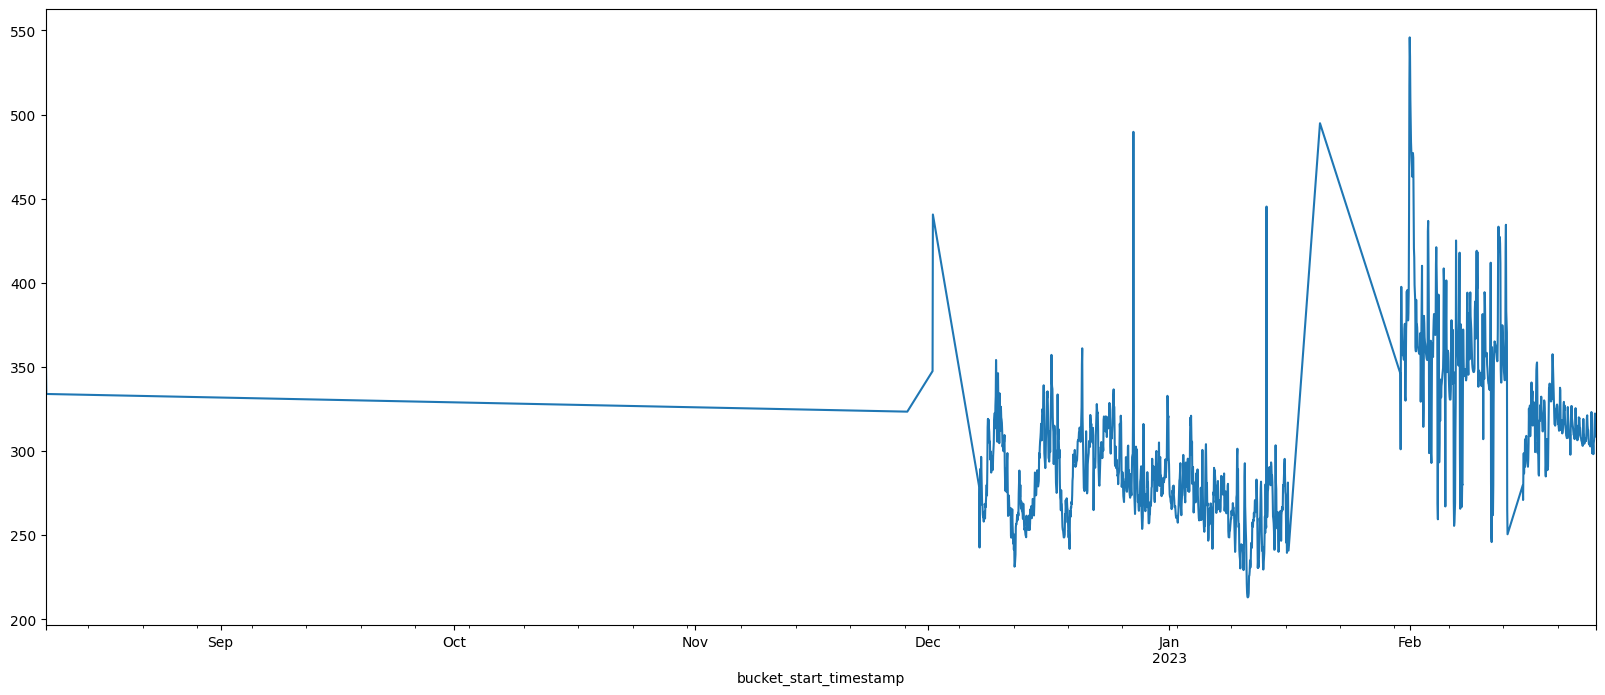

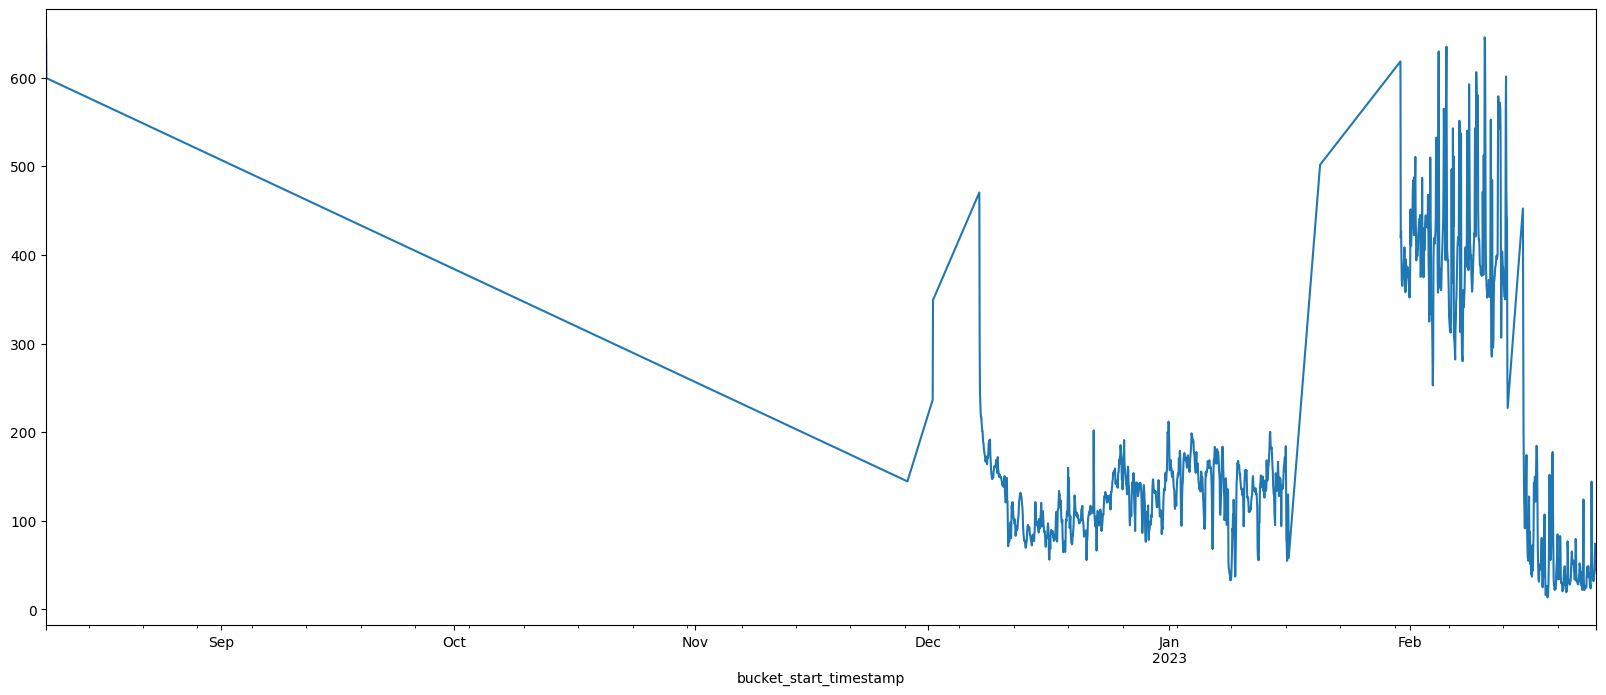

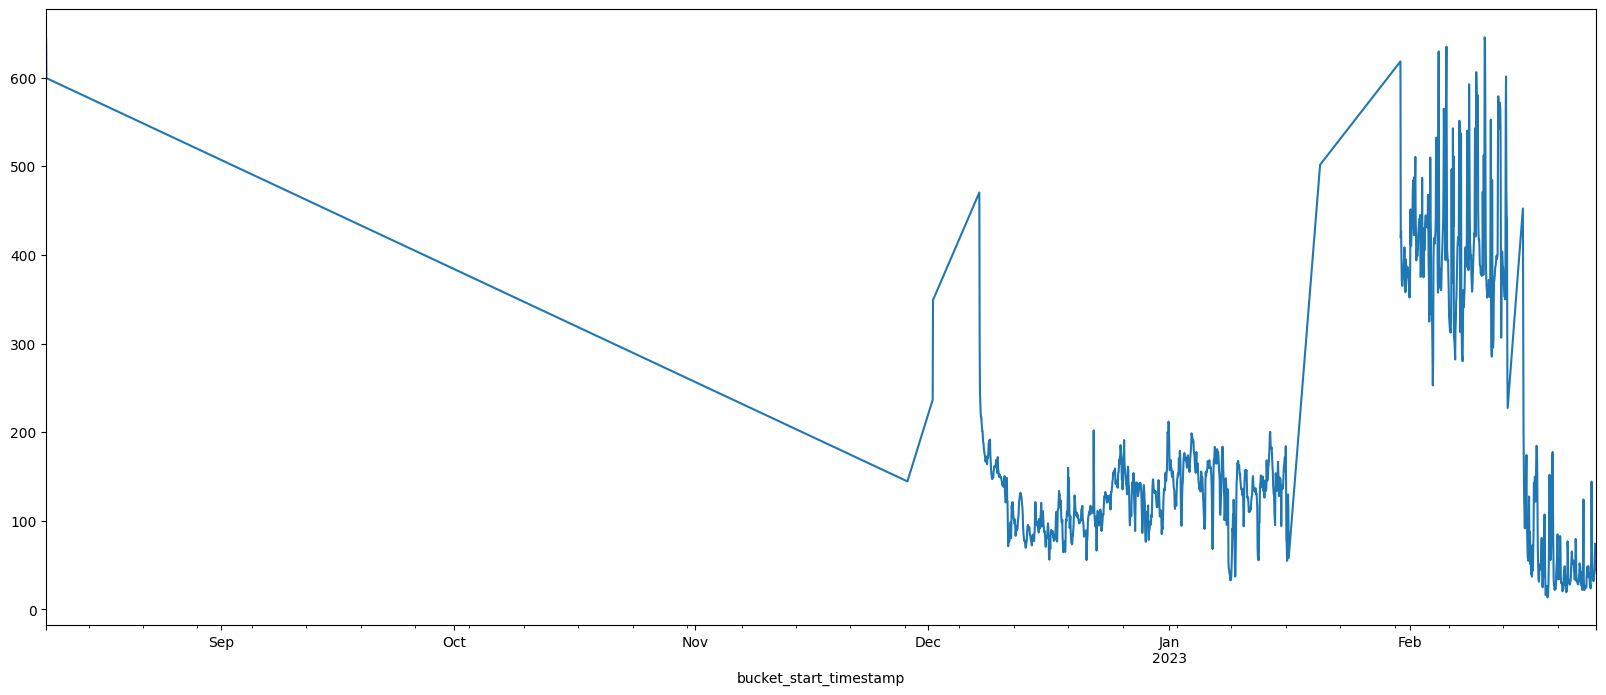

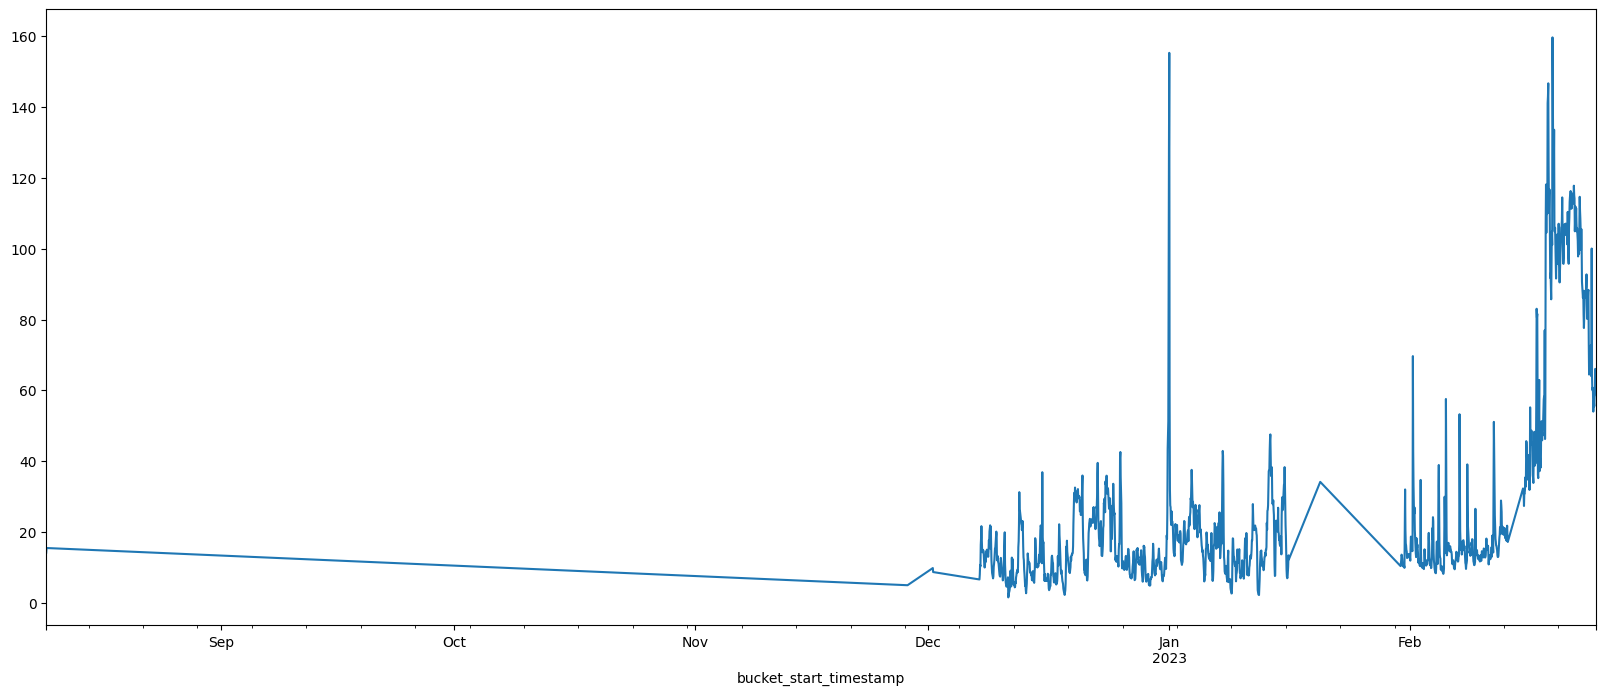

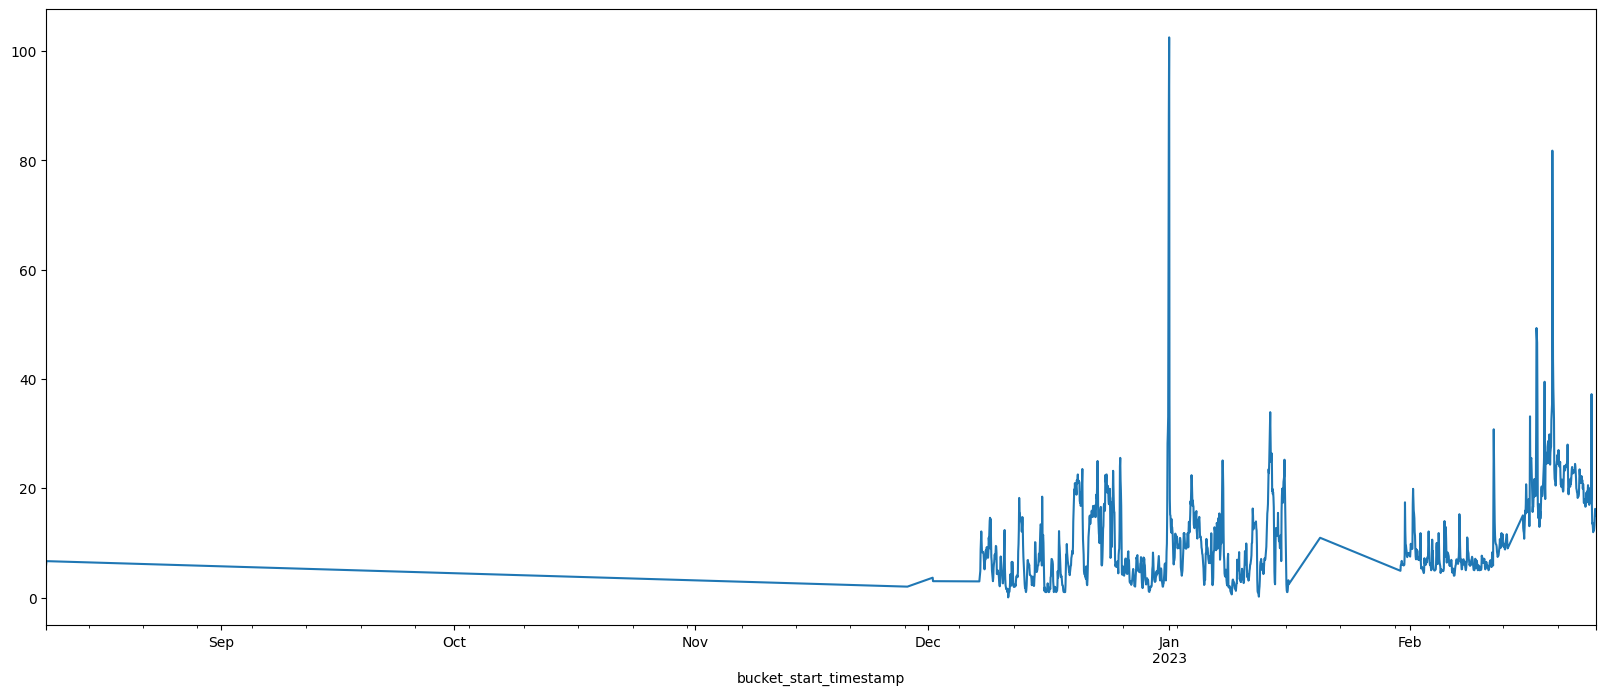

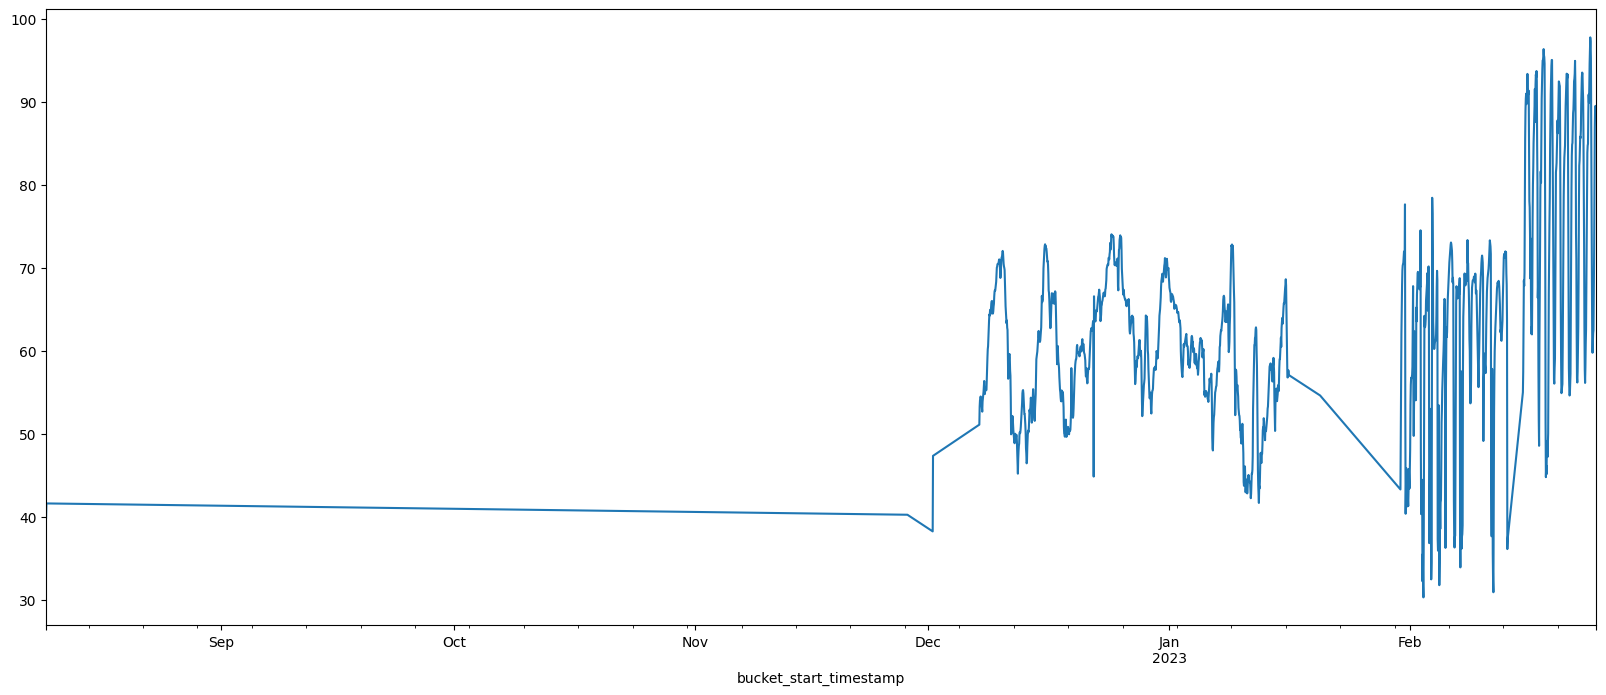

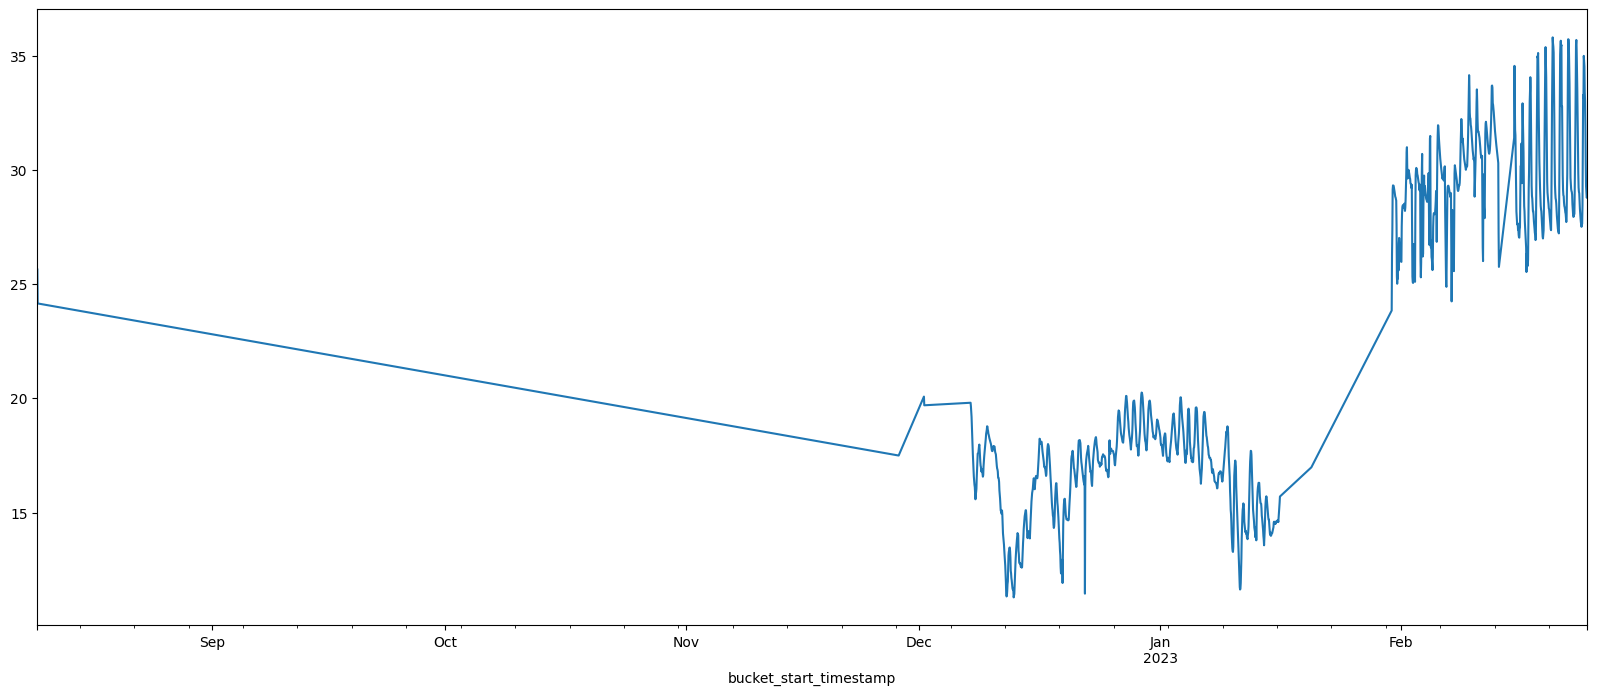

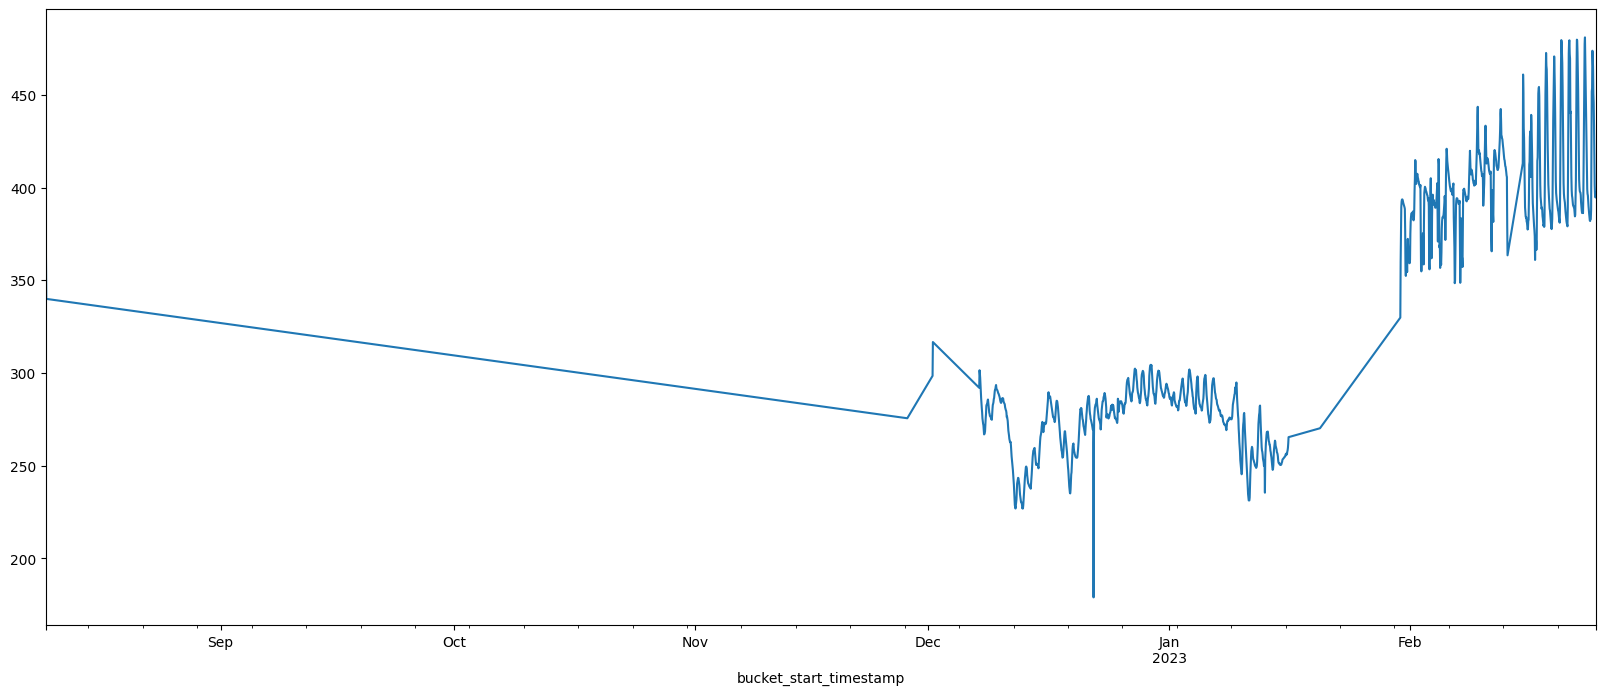

In [49]:
# visualisation des variables quantitatives pour le capteur 188
for colonne in smart188.select_dtypes('float'):
	plt.figure()
	smart188[colonne].plot(figsize=(20, 8))

Matrice de corrélation entre les variables quantitatives

<AxesSubplot: >

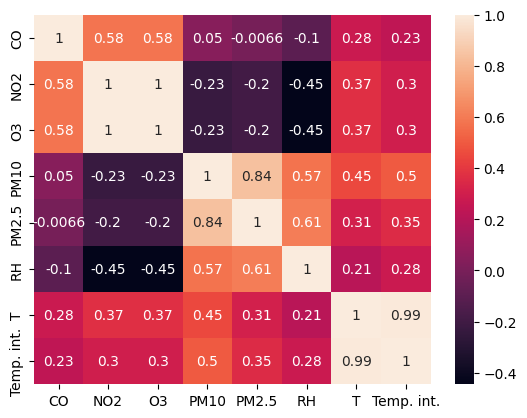

In [46]:
sns.heatmap(smart188[smart188.columns].corr(), annot=True)

<AxesSubplot: >

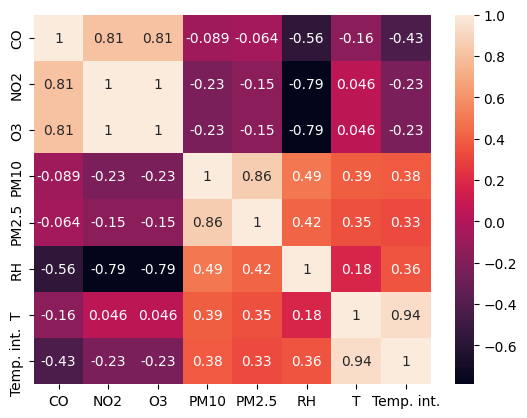

In [45]:
sns.heatmap(smart189[smart189.columns].corr(), annot=True)

## 2. Pré-traitement

### 2.1. Normalisation du dataset

Importation des modules de pre-processing

In [52]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler

Fonction de pré-traitement

In [53]:
def preprocessing_data(data: pd.DataFrame, scaler) -> pd.DataFrame:
    ''' effectue le preprocessing d'un dataset
    '''
    # copie du dataset
    data1 = data.copy()
    # normalisation des variables
    data1.loc[:,'CO':'Temp. int.'] = scaler.fit_transform(data1)
    return data1

In [54]:
scaler = MinMaxScaler()
# scaler = StandardScaler()
# scaler = RobustScaler()
# scaler = MaxAbsScaler()
preprocessed188 = preprocessing_data(smart188, scaler)
preprocessed189 = preprocessing_data(smart188, scaler)
preprocessed188.sample(3)

,CO,NO2,O3,PM10,PM2.5,RH,T,Temp. int.
bucket_start_timestamp,,,,,,,,
2022-09-15 09:00:00,0.352743,0.688023,0.688023,0.066081,0.049591,0.161059,0.434671,0.462225
2022-12-13 15:00:00,0.107398,0.096761,0.096761,0.015598,0.012893,0.257084,0.114799,0.233681
2022-12-19 16:00:00,0.254939,0.119797,0.119797,0.131379,0.135610,0.324729,0.176007,0.273696


### 2.2. Préparation au Machine Learning

Importation des modules pour le Machine Learning

In [56]:
from sklearn.model_selection import train_test_split

Création de l'ensemble d'apprentissage (train set) et de l'ensemble de test (test set)

In [ ]:
# X = preprocessed188[features_columns] # la matrice des features
# y = preprocessed188['exam_result'] # la target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)